In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

Set file to look at containing data

#Import excel file into pandas dataframe

In [2]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'
filepath = 'Data to Import/NPL_Table_All-ANON-Final-ALL.xlsx'

#fullpath=mainpath+filepath
fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
print(fullpath) #note forward and backward slashes in output

all_data = pd.read_excel(filepath, parse_dates=['Date'])
all_data.head()
all_data['OPRatio'].describe()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython/Data to Import/NPL_Table_All-ANON-Final-ALL.xlsx


count    275.000000
mean       0.999381
std        0.008931
min        0.976000
25%        0.994000
50%        1.000000
75%        1.005000
max        1.027000
Name: OPRatio, dtype: float64

#Filter to only contain NHS data

In [3]:
df3 = all_data.copy()
nhs_data = df3[df3['CentreType'].isin(['NHS'])]
pp_data = df3[~df3['CentreType'].isin(['NHS'])] # not NHS = pp

nhs_data.tail()
nhs_data['OPRatio'].describe()
#pp_data['OPRatio'].describe()

count    209.000000
mean       1.001817
std        0.007407
min        0.976000
25%        0.997000
50%        1.001000
75%        1.006000
max        1.027000
Name: OPRatio, dtype: float64

#Calculate some stats & check data types

In [4]:
#Number of unique dates = number of visits

n = nhs_data.groupby(['Type'])['Date'].nunique().reset_index() # number of unique dates = number of visits
a = all_data.groupby(['Type'])['Date'].nunique().reset_index() # number of unique dates = number of visits

print('All' + str(a))
print()
print('NHS' + str(n))


All  Type  Date
0   MV    56
1  MeV    31
2   kV    13

NHS  Type  Date
0   MV    47
1  MeV    23
2   kV    12


#Create seperate dataframes for MV, MeV and kV for NHS

In [277]:
#beam_types = all_data.groupby('Type')
#beam_types.mean()

df2 = nhs_data.copy() ## change this if want to look at all data (all_data)
#df2 = all_data.copy() ## change this if want to look at all data (all_data)

mv_data = df2[df2['Type'].isin(['MV'])]
mev_data = df2[df2['Type'].isin(['MeV'])]
kv_data = df2[df2['Type'].isin(['kV'])]

#df3 = ed.copy()
#mev_data_notg5 = df3[~df3['Centre'].str.contains('CPUK')]
#mev_data_notg5

md = mv_data
ed = mev_data
kd = kv_data
#mv_data.describe()
ed['OPRatio'].describe()
#kv_data.describe()

count    98.000000
mean      1.002749
std       0.007363
min       0.985000
25%       0.998000
50%       1.002950
75%       1.007000
max       1.027000
Name: OPRatio, dtype: float64

#Make some quick graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0869C950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x08789C90>]], dtype=object)

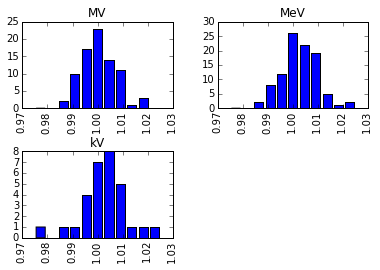

In [6]:
from decimal import * # decimal means that more exact maths can be done with a specified precision.
getcontext().prec = 28
range_lower = Decimal('0.975')
range_upper = Decimal('1.025')
bin_width = Decimal('0.005')
number_bins = (range_upper-range_lower)/bin_width + 1

nhs_data['OPRatio'].hist(by=nhs_data['Type'], normed=False, bins=11, range=(0.975,1.025), rwidth=0.8) #simple auto plot in a grid

#Histograms

##Ideally make into a function and feed data frame, title, filename

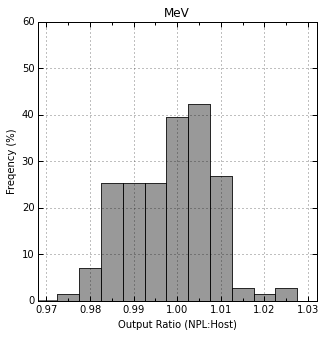

In [7]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('MeV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

mev_data['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = mev_data['OPRatio'].mean()
sd = mev_data['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
#plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_kV_Hist_NHS.png', bbox_inches='tight', dpi=300)

#Get some more stats such as Mean, SD, Skew etc.

In [8]:
print('Skew')
print('All: ', nhs_data['OPRatio'].skew())
print('MV: ', mv_data['OPRatio'].skew())
print('MeV: ', mev_data['OPRatio'].skew())
print('kV: ', kv_data['OPRatio'].skew())
print()
print('SEM')
print('MV: ', mv_data['OPRatio'].sem())
print('MeV: ', mev_data['OPRatio'].sem())
print('kV: ', kv_data['OPRatio'].sem())
print()
print('Mean')
print('MV: ', mv_data['OPRatio'].mean())
print('MeV: ', mev_data['OPRatio'].mean())
print('kV: ', kv_data['OPRatio'].mean())
print()
print('SD')
print('MV: ', mv_data['OPRatio'].std())
print('MeV: ', mev_data['OPRatio'].std())
print('kV: ', kv_data['OPRatio'].std())
print()
from scipy import stats
print('Skew Test')
print('MV: ', stats.skewtest(mv_data['OPRatio']))
print('MeV: ', stats.skewtest(mev_data['OPRatio']))
print('kV: ', stats.skewtest(kv_data['OPRatio']))
#print(stats.skewtest(plotdata['OPRatio']))

Skew
All:  0.307590932966
MV:  0.555154096336
MeV:  0.0230699230515
kV:  -0.571262377258

SEM
MV:  0.000690420246376
MeV:  0.000827933304408
kV:  0.00155993015651

Mean
MV:  0.999378597441
MeV:  0.998354929577
kV:  1.00367436557

SD
MV:  0.00686959471469
MeV:  0.0098659639686
kV:  0.00909587770195

Skew Test
MV:  (2.2412859731286008, 0.025007556964876918)
MeV:  (0.11627069184991964, 0.90743801256092849)
kV:  (-1.4439149116578547, 0.14876291154433058)


#Plot of All Audits

In [282]:
# Calculate rolling SD of 20 values

mv_data_datesort = md.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
mev_data_datesort = ed.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
kv_data_datesort = kd.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
#mv_data_datesort.append('SD_Prev20')

m = mv_data_datesort     # to allow shorter references to dataframes
e = mev_data_datesort
k = kv_data_datesort

m['SD_Prev20'] = np.nan
m['SD_Prev20'] = pd.rolling_std(m['OPRatio'],window=20)

e['SD_Prev20'] = np.nan
e['SD_Prev20'] = pd.rolling_std(e['OPRatio'],window=20)

k['SD_Prev20'] = np.nan
k['SD_Prev20'] = pd.rolling_std(k['OPRatio'],window=20)

k.head()


,Centre_ID,Group,CentreType,Date,Type,Energy,CoP,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments,SD_Prev20
274,40,4,NHS,1998-06-11,kV,30,NaN,NaN,NaN,1.011928,0.6,NaN,NaN,NaN,NaN
57,6,6,NHS,2005-08-09,kV,85,NaN,1.07,3,0.999000,0.6,NaN,NaN,NaN,NaN
58,6,6,NHS,2005-08-09,kV,250,NaN,1.02,5,1.008000,0.8,1.001,0.4,NaN,NaN
103,21,7,NHS,2005-08-25,kV,60,NaN,NaN,NaN,1.002000,0.6,NaN,NaN,NaN,NaN
104,21,7,NHS,2005-08-25,kV,80,NaN,NaN,NaN,0.976000,0.6,NaN,NaN,NaN,NaN


In [10]:
#d = m
#print(d['Date'][1])
#print(dateval[1])

##Histogram

Norm Test:  (2.2412859731287811, 0.02500755696486525)
Mean:  0.999378597441


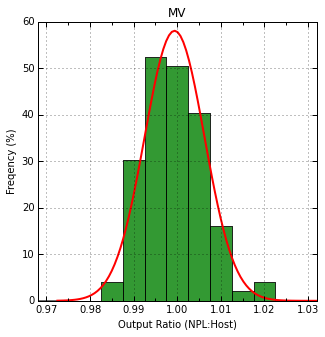

In [11]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

d = m  #m = mv_data_datesort

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('MV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

d['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'green', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = d['OPRatio'].mean()
sd = d['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/FinalData/NPL_MV_NoG9_Hist_Fit.png', bbox_inches='tight', dpi=300)

print('Norm Test: ', str(stats.skewtest(d['OPRatio'])))
print('Mean: ', str(mean))

##All audits in order

In [283]:
# Remove 3 outliers for calc of rolling SD.
# copy the OP column and set values >1.02 to NA?

#copy data to avoid ruining the raw set
enew = e.copy()

#copy OP ratios to new column
enew['OPRatioCorr'] = enew['OPRatio']

#set OP > 1.02 to nan in the hope it can be ignored for rolling stdev
enew.loc[enew.OPRatioCorr > 1.02, 'OPRatioCorr'] = None

#calc rolling stdev for new corrected OP col
enew['SD_Prev20Corr'] = pd.rolling_std(enew['OPRatioCorr'],window=20,min_periods=0)
#enew.tail(100)

#x=np.arange(1,enew['OPRatio'].count()+1)
#x=d['Date']
#y=enew['OPRatio']
#ynew=enew['OPRatioCorr']

#plt.plot(x,y)
#plt.plot(x,ynew)
#enew.head(25)

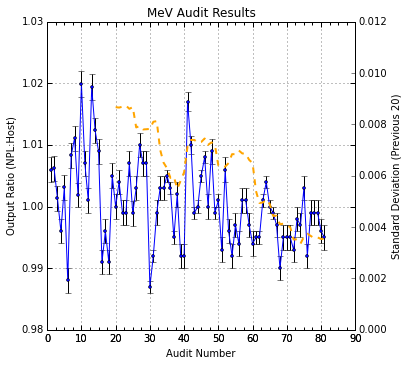

In [311]:
#m = mv_data_datesort

#frames = [m, e, k]
#d=pd.concat(frames) # to join all data together

#d = enew
d = m

#pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
my_dpi=96
fig1 = plt.figure(figsize=(1.06*500/my_dpi, 1.06*500/my_dpi), dpi=my_dpi) # set figure size for ESTRO abstract
#fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
axes1.autoscale(tight=True)
plt.title('MeV Audit Results')
plt.xlabel("Audit Number")
plt.ylabel("Output Ratio (NPL:Host)")
plt.ylim(0.98, 1.03)
#plt.xlim(min(d['Date'])-10, max(d['Date']+10)) #for date plot
plt.margins(x=0.05) # adds some space between points and edge of graph
axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

x=np.arange(1,d['OPRatio'].count()+1)
#x=d['Date']
y=d['OPRatio']
yerr=(d['OPError']*d['OPRatio'])/100

ysd=d['SD_Prev20']

#if igorning OOT results
#ysdcorr=d['SD_Prev20Corr']
#ysdcorr[0:19] = np.nan # to not plot first 20 values of sd calculated

plt.errorbar(x, y, yerr=yerr, ecolor='black', linestyle="-", marker = 'o', markersize=3) # for plotting number of audits
#plt.plot(d['Date'].values,d['OPRatio'], 'o', alpha=0.7) # for plotting date
axes2=fig1.add_subplot(111, sharex=axes1, frameon=False)
axes2.yaxis.tick_right()
axes2.yaxis.set_label_position('right')
plt.ylim(0, 0.012)
plt.ylabel("Standard Deviation (Previous 20)")
line2=axes2.plot(x,ysd, color='orange', ls='--', linewidth=2)
#line2=axes2.plot(x,ysdcorr, color='red', ls='--', linewidth=2)# to show both including and excluding OOT results
#line2=axes2.plot(d['Date'].values,ysd, color='orange', ls='--', linewidth=2) # for plotting date
#line2=axes2.plot(d['Date'].values,ysdcorr, color='red', ls='--', linewidth=2) # for plotting date

#plt.savefig('NPL_Paper_Plots/FinalData/NPL_MeV_All-No_OOT+all_SD_NHS.png', bbox_inches='tight', dpi=300)

#save as 600x800px for abstract
plt.savefig('NPL_Paper_Plots/FinalData/NPL_MV_All_SD_NHS-conf-square.png', bbox_inches='tight', dpi=my_dpi)

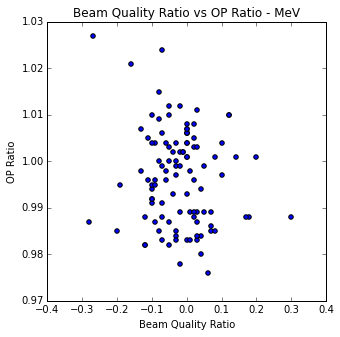

In [23]:
d=e

plt.figure(figsize=(5,5))
#x=d['IntercompRatio']
x=d['BeamQualRatio']
y=d['OPRatio']
plt.scatter(x,y)
#plt.xlim(0.98,1.02)
plt.ylim(0.97,1.03)

plt.title('Beam Quality Ratio vs OP Ratio - MeV')
plt.xlabel("Beam Quality Ratio")
plt.ylabel("OP Ratio")

#plt.savefig('NPL_Paper_Plots/FinalData/NPL_MeV_BeamQualvsOP.png', bbox_inches='tight', dpi=300)

##Add linear fit to graphs

In [24]:
print(d['OPRatio'].head(5))

94     1.0100
95     1.0040
69     1.0040
70     1.0010
199    1.0029
Name: OPRatio, dtype: float64


y = 0.645389361455x + 0.350590831645
Residuals:  [ 0.00820696]


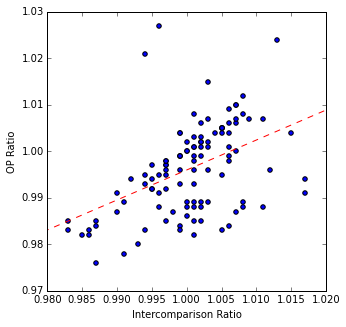

In [25]:
d=e       ## Use np.polyfit() to fit straight lines. weightings can be used with 1/sigma. 

x=d['IntercompRatio'].values
y=d['OPRatio'].values

#print(x,y)

idx = np.isfinite(x) #This checks for NaN values as can't fit NaN values in IntercompRatio
#fit_results = np.polyfit(x[idx], y[idx], 1, cov=True) #use full=True to give residuals, use cov=True to give covariance matrix
#print(fit_results)
(grad, intercept), residuals,  rank, singular_values, rcond  = np.polyfit(x[idx], y[idx], 1, full=True)

print('y = ' + str(grad) + 'x + ' + str(intercept))
print('Residuals: ', residuals)
ext=0.03
xfit=np.linspace(min(x[idx])-ext,max(x[idx])+ext,20)
yfit= (grad*xfit) + intercept

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(xfit,yfit, color='red', ls='--')
plt.xlim(0.98,1.02)
plt.ylim(0.97,1.03)
plt.xlabel('Intercomparison Ratio')
plt.ylabel('OP Ratio')

savename = 'Curve_Fits/IntCompvsOP_kV_linfit.png'
#plt.savefig(savename, bbox_inches='tight', dpi=300)

In [21]:
fit_stuff  = np.polyfit(x[idx], y[idx], 1, cov=True)
var_est = np.diagonal(fit_stuff[1]) # variance estimates are the diagonals in the covariance matrix?

print('Variance Estimates: ', var_est)
print('grad = ', grad-var_est[0], ' - ', grad+var_est[0])
print('intercept = ', intercept-var_est[1], ' - ', intercept+var_est[1])

#yfit1= (grad-var_est[0])*xfit + (intercept+var_est[1])
#yfit2= (grad-var_est[0])*xfit + (intercept-var_est[1])
#yfit3= (grad+var_est[0])*xfit + (intercept+var_est[1])
#yfit4= (grad+var_est[0])*xfit + (intercept-var_est[1])

yfit1= (grad-var_est[0]**0.5)*xfit + (intercept+var_est[1]**0.5)
yfit2= (grad-var_est[0]**0.5)*xfit + (intercept-var_est[1]**0.5)
yfit3= (grad+var_est[0]**0.5)*xfit + (intercept+var_est[1]**0.5)
yfit4= (grad+var_est[0]**0.5)*xfit + (intercept-var_est[1]**0.5)

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(xfit,yfit, color='red', ls='--')
plt.xlim(0.98,1.02)
plt.ylim(0.97,1.03)
plt.xlabel('Intercomparison Ratio')
plt.ylabel('OP Ratio')
plt.plot(xfit,yfit1, color='green', alpha=0.8)
plt.plot(xfit,yfit2, color='orange', alpha=0.8)
plt.plot(xfit,yfit3, color='blue', alpha=0.8)
plt.plot(xfit,yfit4, color='grey', alpha=0.8)

savename = 'Curve_Fits/IntCompvsOP_kV_linfit_errors.png'
plt.savefig(savename, bbox_inches='tight', dpi=300)

IndexError: index 111 is out of bounds for axis 1 with size 111

##Fit confidence interval based on Standard Error

Summary: a=0.3506+/-0.2302, b=0.6454+/-0.2302
Confidence intervals: ci_a=(0.1204 - 0.5808), ci_b=(0.4152 - 0.8755)
Residuals: variance = 0.0001, standard deviation = 0.0087
alpha = 0.050, tval = 1.9820, df=109


NameError: name 'xg9' is not defined

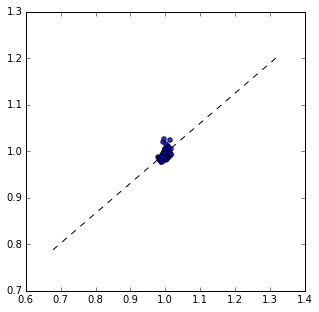

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def fitLine(x, y, alpha=0.05, newx=[], plotFlag=1):
    ''' Fit a curve to the data using a least squares 1st order polynomial fit '''
    
    # Summary data
    n = len(x)   # number of samples     
    
    Sxx = np.sum(x**2) - np.sum(x)**2/n
#    Syy = np.sum(y**2) - np.sum(y)**2/n    # not needed here
    Sxy = np.sum(x*y) - np.sum(x)*np.sum(y)/n    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Linefit
    b = Sxy/Sxx
    a = mean_y - b*mean_x
    
    # Residuals
    fit = lambda xx: a + b*xx    
    residuals = y - fit(x)
    
    var_res = np.sum(residuals**2)/(n-2)
    sd_res = np.sqrt(var_res)
    
    # Confidence intervals
    se_b = sd_res/np.sqrt(Sxx)
    se_a = sd_res*np.sqrt(np.sum(x**2)/(n*Sxx))
    
    df = n-2                            # degrees of freedom
    tval = stats.t.isf(alpha/2., df)    # appropriate t value
    
    ci_a = a + tval*se_a*np.array([-1,1])
    ci_b = b + tval*se_b*np.array([-1,1])

    # create series of new test x-values to predict for
    npts = 100
    #px = np.linspace(np.min(x),np.max(x),num=npts)
    
    ext=0.3
    xfit=np.linspace(min(x)-ext,max(x)+ext,100)
    
    se_fit     = lambda x: sd_res * np.sqrt(  1./n + (x-mean_x)**2/Sxx)
    se_predict = lambda x: sd_res * np.sqrt(1+1./n + (x-mean_x)**2/Sxx)
    
    print ('Summary: a={0:5.4f}+/-{1:5.4f}, b={2:5.4f}+/-{3:5.4f}'.format(a,tval*se_a,b,tval*se_b))
    print ('Confidence intervals: ci_a=({0:5.4f} - {1:5.4f}), ci_b=({2:5.4f} - {3:5.4f})'.format(ci_a[0], ci_a[1], ci_b[0], ci_b[1]))
    print ('Residuals: variance = {0:5.4f}, standard deviation = {1:5.4f}'.format(var_res, sd_res))
    print ('alpha = {0:.3f}, tval = {1:5.4f}, df={2:d}'.format(alpha, tval, df))
    
    # Return info
    ri = {'residuals': residuals, 
        'var_res': var_res,
        'sd_res': sd_res,
        'alpha': alpha,
        'tval': tval,
        'df': df}
    
    if plotFlag == 1:
        # Plot the data
        plt.figure(figsize=(5,5))
        
        plt.plot(xfit, fit(xfit),color='black', ls='--', label='Linear Fit')
       # plt.plot(x,y,'b.', label='Sample observations')
        plt.scatter(x,y, alpha=0.8, label='Data')
        
        # highlight certain points - G9 and OOT
        plt.scatter(xg9,yg9, color = 'orange')
        plt.scatter(xoot,yoot, color = 'red')
        
        x.sort()
        limit = (1-alpha)*100
        
        if conf_int == True:
            plt.plot(xfit, fit(xfit)+tval*se_fit(xfit), 'grey', alpha=0.3, label='Conf. limit ({0:.1f}%)'.format(limit))
            plt.plot(xfit, fit(xfit)-tval*se_fit(xfit), 'grey', alpha=0.3)
        
            plt.fill_between(xfit, fit(xfit)+tval*se_fit(xfit), fit(xfit)-tval*se_fit(xfit), facecolor='grey', alpha=0.3)
        
            plt.plot(xfit, fit(xfit)+tval*se_predict(xfit), 'c--', label='Pred. limit ({0:.1f}%)'.format(limit))
            plt.plot(xfit, fit(xfit)-tval*se_predict(xfit), 'c--')

        
        if min(x)<0:
            plt.xlabel('Beam Quality Difference (cm)')
        else:
            plt.xlabel('Intercomparison Ratio')
            #plt.xlabel('Beam Quality Ratio')
        
        plt.ylabel('Output Ratio')
        if typestr=='MeV' and min(x)<0:
            plt.xlim(-0.4,0.4)
        else:
            plt.xlim(0.97,1.03)
            #plt.xlim(0.8,1.2) # for kV
        
        plt.ylim(0.97,1.03)
        plt.title(typestr)
        
        # configure legend
        #plt.legend(loc='lower right', scatterpoints = 1)
        #leg = plt.gca().get_legend()
        #ltext = leg.get_texts()
        #plt.setp(ltext, fontsize=10)

        # show the plot
        #plt.show()
        
    if newx != []:
        try:
            newx.size
        except AttributeError:
            newx = np.array([newx])
    
        print ('Example: x = {0}+/-{1} => se_fit = {2:5.4f}, se_predict = {3:6.5f}'\
        .format(newx[0], tval*se_predict(newx[0]), se_fit(newx[0]), se_predict(newx[0])))
        
        newy = (fit(newx), fit(newx)-se_predict(newx), fit(newx)+se_predict(newx))
        return (a,b,(ci_a, ci_b), ri, newy)
    else:
        return (a,b,(ci_a, ci_b), ri)
    
#if __name__ == '__main__':
        # example data
        #x = np.array([15.3, 10.8, 8.1, 19.5, 7.2, 5.3, 9.3, 11.1, 7.5, 12.2,
        #              6.7, 5.2, 19.0, 15.1, 6.7, 8.6, 4.2, 10.3, 12.5, 16.1, 
        #              13.3, 4.9, 8.8, 9.5])
        #y = np.array([1.76, 1.34, 1.27, 1.47, 1.27, 1.49, 1.31, 1.09, 1.18, 
        #              1.22, 1.25, 1.19, 1.95, 1.28, 1.52, np.nan, 1.12, 1.37, 
        #              1.19, 1.05, 1.32, 1.03, 1.12, 1.70])
                      
#        goodIndex = np.invert(np.logical_or(np.isnan(x), np.isnan(y)))
        
## Function used to fit line

d=e       ## Use np.polyfit() to fit straight lines. weightings can be used with 1/sigma. 

xraw=d['IntercompRatio'].values
#xraw=d['BeamQualRatio'].values
yraw=d['OPRatio'].values
typestr=d['Type'].values[0] #for title of plot
#print(typestr[0])

# for removing g9
#yraw = d.loc[d['Group']!=9, ['OPRatio']].values
#xraw = d.loc[d['Group']!=9, ['IntercompRatio']].values

# for highlighting key points
#yg9 = d.loc[d['Group']==9, ['OPRatio']]
#xg9 = d.loc[d['Group']==9, ['IntercompRatio']]
#yoot = d.loc[d['OPRatio']>1.02, ['OPRatio']]
#xoot = d.loc[d['OPRatio']>1.02, ['IntercompRatio']]

idx = np.isfinite(xraw) #This checks for NaN values as can't fit NaN values in IntercompRatio
x=xraw[idx]
y=yraw[idx]

conf_int = True #specify whether to plot confidence intervals

(a,b,(ci_a, ci_b), ri,newy) = fitLine(x,y, alpha=0.05,newx=np.array([1,4.5]))

#savename = 'Curve_Fits/BeamQualvsOP_MV_linfit.png'
#plt.savefig(savename, bbox_inches='tight', dpi=300)
#plt.savefig('NPL_Paper_Plots/FinalData/NPL_MeV_IntercompOP_fit-all.png', bbox_inches='tight', dpi=300)

###Calculate Pearsons Correlation Coefficient
(Test for linear correlation)

In [27]:
d=e       ## Use np.polyfit() to fit straight lines. weightings can be used with 1/sigma. 

beamtype = d['Type'].values[0]

xraw=d['IntercompRatio'].values
#xraw=d['BeamQualRatio'].values
yraw=d['OPRatio'].values

# for removing g9
yraw = d.loc[d['Group']!=9, ['OPRatio']].values
xraw = d.loc[d['Group']!=9, ['IntercompRatio']].values

#In [27]: a = np.array([1, 3, 5, 6, 9, 10, 14, 15, 56])
#
#In [28]: np.where(np.logical_and(a>=6, a<=10))
#Out[28]: (array([3, 4, 5]),)

idx = np.isfinite(xraw) #This checks for NaN values as can't fit NaN values in IntercompRatio
x=xraw[idx]
y=yraw[idx]

#plt.scatter(x,y)

pcorr = stats.pearsonr(x,y)
print("Pearsons Correlation Coefficient for *" + beamtype + "* is " + str(pcorr[0]) + " with p-val = " + str(pcorr[1]))

Pearsons Correlation Coefficient for *MeV* is 0.581607962609 with p-val = 2.45169832819e-07


In [28]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x[idx],y[idx])
print('y = ', slope, 'x + ', intercept)
print('R squared: ', r_value**2)
print('Std Error: ', std_err)
print('P Value: ', p_value)

IndexError: too many indices for array

In [29]:
##fitting function taken from http://stackoverflow.com/questions/19379295/linear-regression-with-pandas-dataframe

#from scipy.stats import linregress
#def fit_line1(x, y):
#    """Return slope, intercept of best fit line."""
#    # Remove entries where either x or y is NaN.
#    clean_data = pd.concat([x, y], 1).dropna(0) # row-wise
#    (_, x), (_, y) = clean_data.iteritems()
#    slope, intercept, r, p, stderr = linregress(x, y)
#    return slope, intercept # could also return stderr

#m, b = fit_line1(x, y)
#N = 100 # could be just 2 if you are only drawing a straight line...
#points = np.linspace(x.min(), x.max(), N)
#plt.plot(points, m*points + b)
#plt.scatter(x,y)

Want to do the below with it split into groups, and also split into 5 year periods to see the variation with time. (Similar to Palmer paper...)

Plot all groups OP data as a sort of scatter plot (rather than use box plot?)

##Some statistical analysis such as T-tests
Can see there is no statistical difference between the low and high groupings.

In [30]:
import scipy
ehighlow = scipy.stats.ttest_ind(ehigh['OPRatio'], elow['OPRatio'], equal_var=False)
print("Low vs high MeV: ", "T-Stat: ", ehighlow[0], " p-val: ", ehighlow[1])
mhighlow = scipy.stats.ttest_ind(mhigh['OPRatio'], mlow['OPRatio'], equal_var=False)
print("Low vs high MV: ", "T-Stat: ", mhighlow[0], " p-val: ", mhighlow[1])
khighlow = scipy.stats.ttest_ind(khigh['OPRatio'], klow['OPRatio'], equal_var=False)
print("Low vs high kV: ", "T-Stat: ", khighlow[0], " p-val: ", khighlow[1])

em = scipy.stats.mannwhitneyu(e['OPRatio'], m['OPRatio']) # mannwitneyu test used to compare without assumtion of gaussian errors...
print("MeV vs MV: ", "T-Stat: ", em[0], " p-val: ", em[1])


NameError: name 'ehigh' is not defined

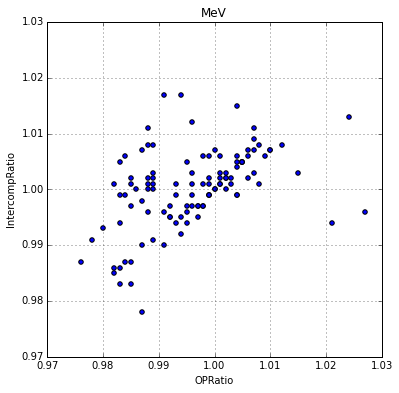

In [31]:
## OP ratio vs IntercompRatio has a trend.
## i.e. intercomparison is good, but the absolute calibration is off?
comp = e

compare = comp.plot(kind='scatter', x='OPRatio',y='IntercompRatio', figsize=(6,6), ylim=(0.97,1.03), xlim=(0.97,1.03), title="MeV")
fig = compare.get_figure()
#fig.savefig('NPL_Paper_Plots/NPL_MeV_OPvsIntercomp_NHS.png', bbox_inches='tight', dpi=300)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04323DF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x04A155F0>]], dtype=object)

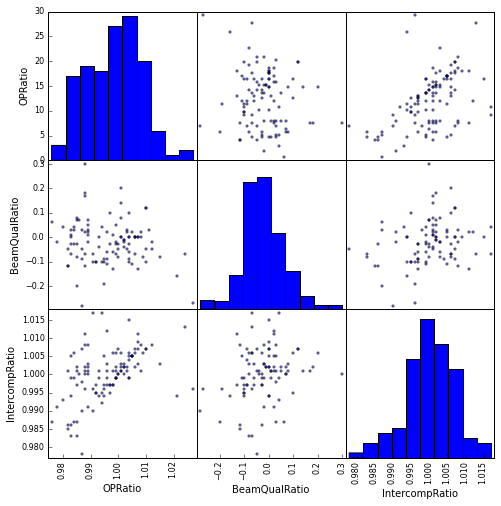

In [32]:
from pandas.tools import plotting
plotting.scatter_matrix(e[['OPRatio', 'BeamQualRatio', 'IntercompRatio']], figsize=(8,8))

##Histogram of different energies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0459CB50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0F23CF50>]], dtype=object)

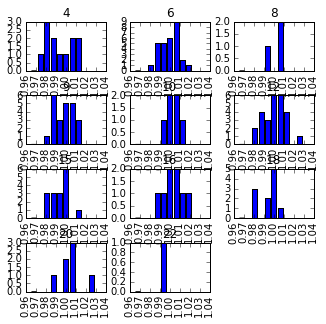

In [33]:
d = e
plt.figure()
d['OPRatio'].hist(by=d['Energy'],normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)


##Histogram of different regions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0FEEBE70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x103ADC10>]], dtype=object)

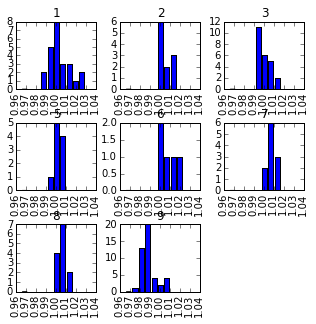

In [34]:
d=e
plt.figure()
d['OPRatio'].hist(by=d['Group'],normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)

##Histogram for different CoPs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1047DAB0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114FF410>], dtype=object)

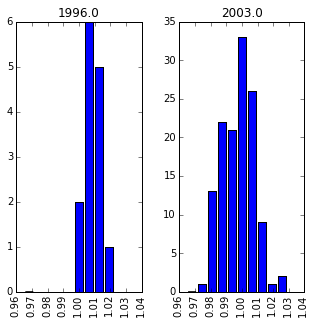

In [35]:
d=e
plt.figure()
d['OPRatio'].hist(by=d['CoP'],normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)
#d['OPRatio'].hist(by=d['CoP'])

## test if the mean is 1.0 for OPRatios using 1 sided t-test

In [36]:
import scipy
scipy.stats.ttest_1samp(m['OPRatio'], 1)

(-0.90003524953488723, 0.37030784634132563)

MV


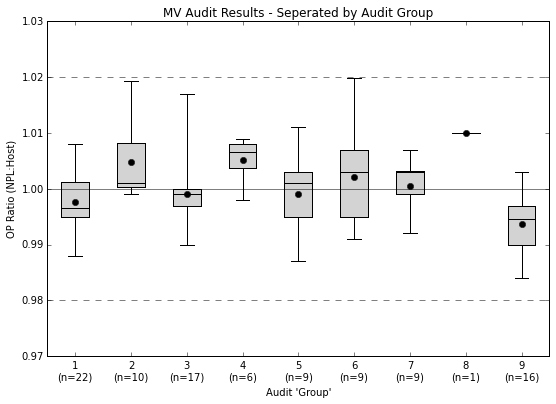

In [37]:
# extract only Groups and OPRatio to allow simple box plot production 
#mv = mv_data_datesort[['Group', 'OPRatio']]

# make a numpy array to use rather than pandas?
#g = np.array(mv_data_datesort['Group'])
#op = np.array(mv_data_datesort['OPRatio'])

#m = mv_data_datesort

d = m

#mv_data_datesort

g1 = d.loc[d['Group']==1, ['OPRatio']]
g2 = d.loc[d['Group']==2, ['OPRatio']]
g3 = d.loc[d['Group']==3, ['OPRatio']]
g4 = d.loc[d['Group']==4, ['OPRatio']]
g5 = d.loc[d['Group']==5, ['OPRatio']]
g6 = d.loc[d['Group']==6, ['OPRatio']]
g7 = d.loc[d['Group']==7, ['OPRatio']]
g8 = d.loc[d['Group']==8, ['OPRatio']]
g9 = d.loc[d['Group']==9, ['OPRatio']]

if len(g9) != 0:
    grouped=[g1,g2,g3,g4,g5,g6,g7,g8,g9] # this should be able to be done a bit easier without splitting it all up first.
    grouped_means = [g1.mean(), g2.mean(), g3.mean(), g4.mean(), g5.mean(), g6.mean(), g7.mean(), g8.mean(), g9.mean()]
else:
    grouped=[g1,g2,g3,g4,g5,g6,g7,g8] # NHS only
    grouped_means = [g1.mean(), g2.mean(), g3.mean(), g4.mean(), g5.mean(), g6.mean(), g7.mean(), g8.mean()]

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)

bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)
ticklist=[]
for i in range(0,len(grouped)):
    ticklist = np.append(ticklist,str(str(i+1) + '\n(n=' + str(len(grouped[i])) + ')'))
    
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ticklist) #custom ticklist
plt.xticks(range(1,len(grouped)+1), ticklist) #custom ticklist which adapts size

plt.axhline(1, linestyle='-', color='black', alpha=0.5) #add line at OPRatio=1
plt.axhline(1.02, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1.02
plt.axhline(0.98, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=0.98

typestr=d['Type'].values[0]
print(typestr)

if typestr == 'MV':
    plt.title('MV Audit Results - Seperated by Audit Group')
if typestr == 'MeV':
    plt.title('MeV Audit Results - Seperated by Audit Group')
if typestr == 'kV':
    plt.title('kV Audit Results - Seperated by Audit Group')

plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/FinalData/NPL_kV_All_Groups_All.png', bbox_inches='tight', dpi=300)

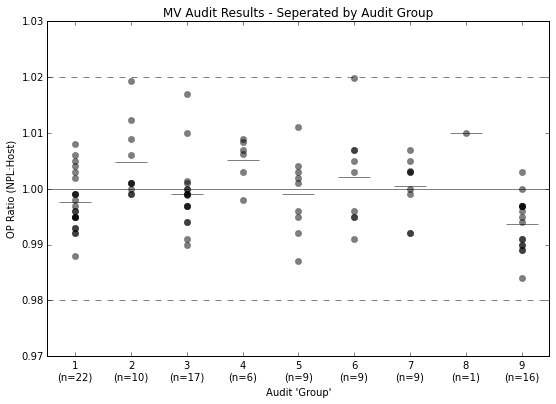

In [38]:
# draw above plot but showign data points

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(ticklist)

#one = plt.plot([0,10],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

plt.axhline(1, linestyle='-', color='black', alpha=0.5) #add line at OPRatio=1
plt.axhline(1.02, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1.02
plt.axhline(0.98, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=0.98

for i in range(0, len(grouped)):
    scat = plt.plot(np.linspace(i+1,i+1,len(grouped[i])), grouped[i], u'o', color='black', alpha=0.5, linewidth=2)

# plot means for each group
plt.scatter(range(1,len(grouped_means)+1), grouped_means, marker = '_', s=1000, color='black', alpha=0.5)

plt.xlim(0.5,len(grouped)+0.5)
plt.ylim(0.97,1.03)
if typestr == 'MV':
    plt.title('MV Audit Results - Seperated by Audit Group')
if typestr == 'MeV':
    plt.title('MeV Audit Results - Seperated by Audit Group')
if typestr == 'kV':
    plt.title('kV Audit Results - Seperated by Audit Group')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")


##### can add box plot over the top by uncommenting the below line

#bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)

for box in bp['boxes']:
    box.set(facecolor='Green', alpha=0.2)
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(linestyle='-',color='red')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/FinalData/NPL_MeV_All-SeperatePts+mean - All Data.png', bbox_inches='tight', dpi=300)

###Want to plot all beam types on same graph...
Could set the gorups to 1.1, 1.2, 1.3 etc
or could plot each on a different x axis which ios slightly offset?

Need to have all data in seperate groups g1e, g1m, g1k etc...

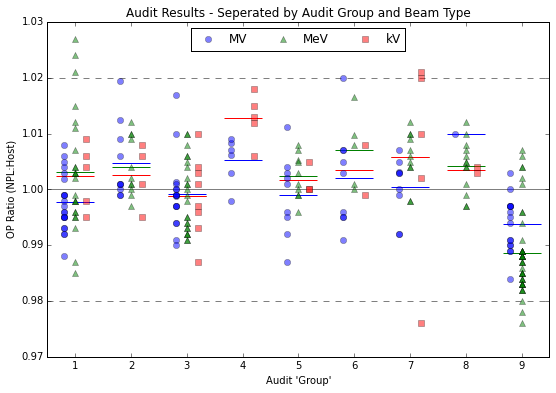

In [223]:
d = all_data
#d = nhs_data

# get OP data for all beam types for eahc group

g1m = d.loc[(d['Group']==1) & (d['Type'] =='MV'), ['OPRatio']] # '&' must be used as 'and' throws an error.
g2m = d.loc[(d['Group']==2) & (d['Type'] =='MV'), ['OPRatio']]
g3m = d.loc[(d['Group']==3) & (d['Type'] =='MV'), ['OPRatio']]
g4m = d.loc[(d['Group']==4) & (d['Type'] =='MV'), ['OPRatio']]
g5m = d.loc[(d['Group']==5) & (d['Type'] =='MV'), ['OPRatio']]
g6m = d.loc[(d['Group']==6) & (d['Type'] =='MV'), ['OPRatio']]
g7m = d.loc[(d['Group']==7) & (d['Type'] =='MV'), ['OPRatio']]
g8m = d.loc[(d['Group']==8) & (d['Type'] =='MV'), ['OPRatio']]
g9m = d.loc[(d['Group']==9) & (d['Type'] =='MV'), ['OPRatio']]

g1e = d.loc[(d['Group']==1) & (d['Type'] =='MeV'), ['OPRatio']]
g2e = d.loc[(d['Group']==2) & (d['Type'] =='MeV'), ['OPRatio']]
g3e = d.loc[(d['Group']==3) & (d['Type'] =='MeV'), ['OPRatio']]
g4e = d.loc[(d['Group']==4) & (d['Type'] =='MeV'), ['OPRatio']]
g5e = d.loc[(d['Group']==5) & (d['Type'] =='MeV'), ['OPRatio']]
g6e = d.loc[(d['Group']==6) & (d['Type'] =='MeV'), ['OPRatio']]
g7e = d.loc[(d['Group']==7) & (d['Type'] =='MeV'), ['OPRatio']]
g8e = d.loc[(d['Group']==8) & (d['Type'] =='MeV'), ['OPRatio']]
g9e = d.loc[(d['Group']==9) & (d['Type'] =='MeV'), ['OPRatio']]

g1k = d.loc[(d['Group']==1) & (d['Type'] =='kV'), ['OPRatio']]
g2k = d.loc[(d['Group']==2) & (d['Type'] =='kV'), ['OPRatio']]
g3k = d.loc[(d['Group']==3) & (d['Type'] =='kV'), ['OPRatio']]
g4k = d.loc[(d['Group']==4) & (d['Type'] =='kV'), ['OPRatio']]
g5k = d.loc[(d['Group']==5) & (d['Type'] =='kV'), ['OPRatio']]
g6k = d.loc[(d['Group']==6) & (d['Type'] =='kV'), ['OPRatio']]
g7k = d.loc[(d['Group']==7) & (d['Type'] =='kV'), ['OPRatio']]
g8k = d.loc[(d['Group']==8) & (d['Type'] =='kV'), ['OPRatio']]
g9k = d.loc[(d['Group']==9) & (d['Type'] =='kV'), ['OPRatio']]


#calculate means and group the data together ready for plotting
if len(g9) != 0:
    grouped_m=[g1m,g2m,g3m,g4m,g5m,g6m,g7m,g8m,g9m] # this should be able to be done a bit easier without splitting it all up first.
    grouped_e=[g1e,g2e,g3e,g4e,g5e,g6e,g7e,g8e,g9e]
    grouped_k=[g1k,g2k,g3k,g4k,g5k,g6k,g7k,g8k,g9k]
    grouped_m_means = [g1m.mean(), g2m.mean(), g3m.mean(), g4m.mean(), g5m.mean(), g6m.mean(), g7m.mean(), g8m.mean(), g9m.mean()]
    grouped_e_means = [g1e.mean(), g2e.mean(), g3e.mean(), g4e.mean(), g5e.mean(), g6e.mean(), g7e.mean(), g8e.mean(), g9e.mean()]
    grouped_k_means = [g1k.mean(), g2k.mean(), g3k.mean(), g4k.mean(), g5k.mean(), g6k.mean(), g7k.mean(), g8k.mean(), g9k.mean()]
else:
    grouped_m=[g1m,g2m,g3m,g4m,g5m,g6m,g7m,g8m] # NHS only
    grouped_e=[g1e,g2e,g3e,g4e,g5e,g6e,g7e,g8e]
    grouped_k=[g1k,g2k,g3k,g4k,g5k,g6k,g7k,g8k]
    grouped_m_means = [g1m.mean(), g2m.mean(), g3m.mean(), g4m.mean(), g5m.mean(), g6m.mean(), g7m.mean(), g8m.mean()]
    grouped_e_means = [g1e.mean(), g2e.mean(), g3e.mean(), g4e.mean(), g5e.mean(), g6e.mean(), g7e.mean(), g8e.mean()]
    grouped_k_means = [g1k.mean(), g2k.mean(), g3k.mean(), g4k.mean(), g5k.mean(), g6k.mean(), g7k.mean(), g8k.mean()]
    
#print(grouped_e_means)

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8,9])
#ax.set_xticklabels(ticklist)

#one = plt.plot([0,10],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

plt.axhline(1, linestyle='-', color='black', alpha=0.5) #add line at OPRatio=1
plt.axhline(1.02, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1.02
plt.axhline(0.98, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=0.98

for i in range(0, len(grouped_m)):
    scatMV = plt.plot(np.linspace(i+1,i+1,len(grouped_m[i]))-0.2, grouped_m[i], u'o', color='blue', alpha=0.5, linewidth=2, label='MV' if i == 0 else "")
    
for i in range(0, len(grouped_e)):
    scatMeV = plt.plot(np.linspace(i+1,i+1,len(grouped_e[i])), grouped_e[i], u'^', color='green', alpha=0.5, linewidth=2, label='MeV' if i == 0 else "")

for i in range(0, len(grouped_k)):
    scatkV = plt.plot(np.linspace(i+1,i+1,len(grouped_k[i]))+0.2, grouped_k[i], u's', color='red', alpha=0.5, linewidth=2, label='kV' if i == 0 else "")

# plot means for each group
plt.scatter(range(1,len(grouped_m_means)+1), grouped_m_means, marker = '_', s=1500, color='blue', alpha=1)
plt.scatter(range(1,len(grouped_e_means)+1), grouped_e_means, marker = '_', s=1500, color='green', alpha=1)
plt.scatter(range(1,len(grouped_k_means)+1), grouped_k_means, marker = '_', s=1500, color='red', alpha=1)
plt.legend(loc='upper center', numpoints=1, ncol=3)


plt.xlim(0.5,len(grouped)+0.5)
plt.ylim(0.97,1.03)
plt.title('Audit Results - Seperated by Audit Group and Beam Type')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")

#plt.savefig('NPL_Paper_Plots/FinalData/NPL_All-SeperatePts+mean - All Data.png', bbox_inches='tight', dpi=300)

Need to add n=?? for each group. Or this can just be in the text...

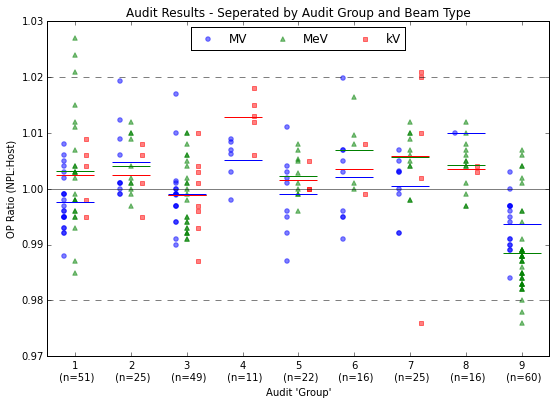

In [275]:
#for d['Group']==1
# potentially a much easier way of creating the above graph...
# just need to separate the different beam types

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8,9])

#set tick labels
no_counts=d['Group'].value_counts(sort=False)
ticklist = []
for i in range(1,len(no_counts)+1):
    ticklist.append(str(i) + '\n (n=' + str(no_counts[i]) + ')')
    
ax.set_xticklabels(ticklist)

# get means
m_meancalc=m.groupby(['Group'])['OPRatio'].mean()
e_meancalc=e.groupby(['Group'])['OPRatio'].mean()
k_meancalc=k.groupby(['Group'])['OPRatio'].mean()

m_means=[]
e_means=[]
k_means=[]

for i in range(1,max(m['Group'])+1):
    m_means.append(m_meancalc[i])
    
for i in range(1,max(e['Group'])+1): # group 4 has no values so need to skip this and set to None
    if i!=4:
        e_means.append(e_meancalc[i])
    else:
        e_means.append(None)
    
for i in range(1,max(k['Group'])+1):
    k_means.append(k_meancalc[i])

plt.axhline(1, linestyle='-', color='black', alpha=0.5) #add line at OPRatio=1
plt.axhline(1.02, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1.02
plt.axhline(0.98, linestyle='--', color='black', alpha=0.5) #add line at OPRatio=0.98

plt.scatter(m['Group']-0.2,m['OPRatio'], alpha=0.5, marker = 'o', color='blue', label='MV')
plt.scatter(e['Group'],e['OPRatio'], alpha=0.5, marker = '^', color='green', label='MeV')
plt.scatter(k['Group']+0.2,k['OPRatio'], alpha=0.5, marker = 's', color='red', label='kV')

plt.scatter(range(1,len(m_means)+1), m_means, marker = '_', s=1500, color='blue', alpha=1)
plt.scatter(range(1,len(e_means)+1), e_means, marker = '_', s=1500, color='green', alpha=1)
plt.scatter(range(1,len(k_means)+1), k_means, marker = '_', s=1500, color='red', alpha=1)

plt.xlim(0.5,len(grouped)+0.5)
plt.ylim(0.97,1.03)
plt.title('Audit Results - Seperated by Audit Group and Beam Type')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")

plt.legend(loc='upper center', scatterpoints=1, ncol=3)

plt.savefig('NPL_Paper_Plots/FinalData/NPL_All-SeperatePts+mean1 - All Data.png', bbox_inches='tight', dpi=300)
  
# means were trickier as there are none in group 4 so need to set as a mean of zero in a loop somehow...
# but code is still simpler and shorter

In [ ]:
# Construct the label names for the x-axis including n=1
# this is used above in constructing the graphs

ticklist=[]
for i in range(0,len(grouped)):
    ticklist = np.append(ticklist,str('1\n(n=' + str(len(grouped[i])) + ')'))
    
print(ticklist)

In [183]:
# total number of entries for each group

no_counts=d['Group'].value_counts(sort=False)

ticklist = []

for i in range(1,len(no_counts)+1):
    ticklist.append(str(i) + '\n (n=' + str(no_counts[i]) + ')')
    
print(ticklist)

['1\n (n=51)', '2\n (n=25)', '3\n (n=49)', '4\n (n=11)', '5\n (n=22)', '6\n (n=16)', '7\n (n=25)', '8\n (n=16)', '9\n (n=60)']


In [271]:
#get means for each group

m_meancalc=m.groupby(['Group'])['OPRatio'].mean()
e_meancalc=e.groupby(['Group'])['OPRatio'].mean()
k_meancalc=k.groupby(['Group'])['OPRatio'].mean()

m_means=[]
e_means=[]
k_means=[]

for i in range(1,len(m_meancalc)+1):
    m_means.append(m_meancalc[i])
    
for i in range(1,len(e_meancalc)+2):
    if i==4:
        e_means.append(None)
    else:
        e_means.append(e_meancalc[i])
    
for i in range(1,len(k_meancalc)+1):
    k_means.append(k_meancalc[i])

print(m_means)
print(e_means)
print(k_means)


#for i in range(1,len(xyz)+1):
#    e_means.append(xyz[i])
#print(e_means)

[0.99772387318563749, 1.0047730488553432, 0.99913089284643508, 1.0052484902791354, 0.99901111111111107, 1.0020999999999998, 1.0004565919982167, 1.01, 0.99374999999999991]
[1.0031666666666668, 1.0040909090909091, 0.99883333333333335, None, 1.0023200000000001, 1.0070400000000002, 1.0057272727272726, 1.004230769230769, 0.98856818181818162]
[1.0024000000000002, 1.0024999999999999, 0.99887499999999996, 1.0127856858846918, 1.0016666666666667, 1.0035000000000001, 1.0058, 1.0034999999999998]


##Split MeV data by energy

In [ ]:
d = e

e1 = d.loc[d['Energy']==4, ['OPRatio']]
e2 = d.loc[d['Energy']==6, ['OPRatio']]
e3 = d.loc[d['Energy']==8, ['OPRatio']]
e4 = d.loc[d['Energy']==9, ['OPRatio']]
e5 = d.loc[d['Energy']==10, ['OPRatio']]
e6 = d.loc[d['Energy']==12, ['OPRatio']]
e7 = d.loc[d['Energy']==15, ['OPRatio']]
e8 = d.loc[d['Energy']==16, ['OPRatio']]
e9 = d.loc[d['Energy']==18, ['OPRatio']]
e10 = d.loc[d['Energy']==20, ['OPRatio']]
e11 = d.loc[d['Energy']==22, ['OPRatio']]

grouped=[e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
#labels = list('ABCDEFGHIJK')
labels = ['4','6','8','9','10','12','15','16','18','20','22']


bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True, labels=labels)
plt.plot([-1,20],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1
plt.title('MeV Audit Results - Seperated by Energy')
plt.xlabel("Energy (MeV)")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

#ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11], ['4','6','8','9','10','12','15','16','18','20','22'])

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_NHS.png', bbox_inches='tight', dpi=300)

##Is there any different between electron CoPs?
1996 vs 2003

In [ ]:
e1996 = e.loc[e['CoP']==1996]
e2003 = e.loc[e['CoP']==2003]

e1996.describe()


In [ ]:
plt.plot(e1996['OPRatio'])

plt.plot(e2003['OPRatio'])

In [ ]:
d = e1996
#d = e2003

d['OPRatio'].hist(normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)

In [ ]:
print('1996 SD: ' + str(e1996['OPRatio'].std()))
print('2003 SD: ' + str(e2003['OPRatio'].std()))

###1996 summary

In [ ]:
e1996['OPRatio'].describe()

###2003 summary

In [ ]:
e2003['OPRatio'].describe()

e2003_remove_oot = e2003.loc[e2003['OPRatio']<=1.02]
e2003_remove_oot['OPRatio'].describe()

### SEM for each CoP

In [ ]:
e1996sem = e1996['OPRatio'].sem()
e2003sem = e2003['OPRatio'].sem()
e2003_remove_oot_sem = e2003_remove_oot['OPRatio'].sem()
print('1996: ', e1996sem)
print('2003: ', e2003sem)
print('2003 no oot: ', e2003_remove_oot_sem)

##t test to see if 1996 and 2003 are different

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(e1996['OPRatio'], e2003_remove_oot['OPRatio'])
#ttest_ind(e1996['OPRatio'], e2003['OPRatio'])


This indicates that there **is** a difference between the two CoPs

##Welch's t-test also shows they are different
###This does not assume equal variance and sample size which is what we have

In [ ]:
ttest_ind(e1996['OPRatio'], e2003_remove_oot['OPRatio'], equal_var=False)
#(t stat, p-val)

###Wilcoxon test shows the same.

In [ ]:
from scipy.stats import ranksums
ranksums(e1996['OPRatio'], e2003_remove_oot['OPRatio'])

In [ ]:
##plot of both 1996 and 2003 on same axes
##also do a gaussian plot of each from SD etc?

mean1996 = e1996['OPRatio'].mean()
sd1996 = e1996['OPRatio'].std()
mean2003 = e2003['OPRatio'].mean()
sd2003 = e2003['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
#plt.plot(x, 1*mlab.normpdf(x,mean1996,sd1996), linewidth = 2, color='red', label = '1996')
#plt.plot(x, 1*mlab.normpdf(x,mean2003,sd2003), linewidth = 2, color='blue', label = '2003')
plt.xlim(0.97, 1.03)
nbins=12
plt.hist(e1996['OPRatio'].values, color='red', alpha=0.5, bins = nbins, range = (0.97,1.03), label = '1996 CoP', normed = False)
plt.hist(e2003['OPRatio'].values, color='blue', alpha=0.3, bins = nbins, range = (0.97,1.03), label = '2003 CoP', normed = False)
plt.legend(loc='best')
plt.xlabel("Output Ratio")
plt.ylabel("No. Results")
plt.title("1996 and 2003 MeV CoP")
plt.grid(True, which='major')

plt.savefig('NPL_Paper_Plots/FinalData/NPL_MeV_1996vs2003_NoG9_NHS.png', bbox_inches='tight', dpi=300)
